In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [10]:
cancer = pd.read_csv('data/cancer.csv')

In [11]:
cancer[:5]

,type,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
boston = pd.read_csv('data/boston.csv')
boston[:5]

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
y = boston['Price']
X = boston.values[:, 1:].astype('float32')

In [14]:
X.shape

(506, 13)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

```
Q: 적절한 샘플의 갯수는?
 -> 샘플이 충분한지 판단하는 기준?
```

In [39]:
from sklearn.linear_model import Ridge

In [40]:
비율범위 = np.arange(0.1, 1.1, 0.1) # 10%씩 늘려보며 충분한 수인지 검증

train_results = {} # Dictionary 로 만들기
for 비율 in 비율범위:
    샘플수 = int(len(X_train) * 비율) + 1 
    X_train_batch = X_train[:샘플수]
    y_train_batch = y_train[:샘플수]
    
    ridge = Ridge(alpha=1.0).fit(X_train_batch, y_train_batch)
    train_score = ridge.score(X_train_batch, y_train_batch)
    test_score = ridge.score(X_test, y_test)
    train_results[샘플수] = (train_score, test_score)
    
train_results = pd.DataFrame(train_results).T
train_results.columns = ['train', 'test']
train_results

,train,test
38,0.855682,0.489800
76,0.840898,0.573860
114,0.807497,0.654618
152,0.763286,0.668729
190,0.769490,0.671049
228,0.744372,0.685855
266,0.746868,0.689501
304,0.749573,0.691509
342,0.752399,0.690802
380,0.751867,0.687679


약 190개의 샘플 이후에는 어느정도 성능이 비슷하다

In [41]:
train_test_styles = {'train': 'go--', 'test': 'ro--'}

학습 곡선

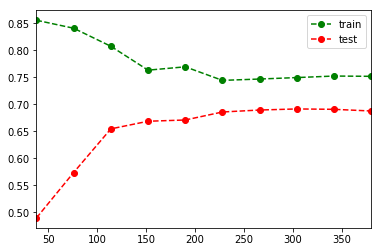

In [42]:
train_results.plot(style=train_test_styles)

```
모델을 만들 때마다 매번 샘플의 갯수 등을 고려해야 한다.
 -> 빅데이터는 과대적합을 해결하는 데는 도움이 되지만, 과소적합을 해결하는 것에는 도움이 되지 않을 수 있다.
```

Discussion : Train, Test Split이 나누어짐에 따라 성능이 달라질 수 있으므로 '교차 검증'을 이용한 평균 성능 측정이 필요함

# 로지스틱 회귀

In [43]:
y = cancer['type']
X = cancer.values[:, 1:].astype('float32')

In [44]:
y.value_counts()

benign       357
malignant    212
Name: type, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logreg = LogisticRegression().fit(X_train, y_train)

In [55]:
logreg.score(X_test, y_test)

0.965034965034965

In [56]:
예측확률 = logreg.predict_proba(X_test)

In [57]:
pd.DataFrame(예측확률)[:10]

,0,1
0,1.119007e-01,0.888099
1,9.956511e-01,0.004349
2,3.451017e-12,1.000000
3,7.230448e-03,0.992770
4,9.996209e-01,0.000379
5,9.928965e-01,0.007103
6,9.977118e-01,0.002288
7,9.952118e-01,0.004788
8,1.784606e-01,0.821539
9,2.713963e-02,0.972860


Sigmoid 함수가 자신감의 정도를 0과 1사이로 변환

In [59]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
C_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

train_results = {}
for C in C_range:
    logreg = LogisticRegression(C=C).fit(X_train, y_train)
    train_score = logreg.score(X_train, y_train)
    test_score = logreg.score(X_test, y_test)
    train_results[C] = (train_score, test_score)

train_results = pd.DataFrame(train_results).T
train_results.columns = ['train', 'test']
train_results

,train,test
0.001,0.924883,0.937063
0.010,0.931925,0.951049
0.100,0.941315,0.965035
1.000,0.953052,0.965035
10.000,0.957746,0.979021
100.000,0.967136,0.972028
1000.000,0.967136,0.972028


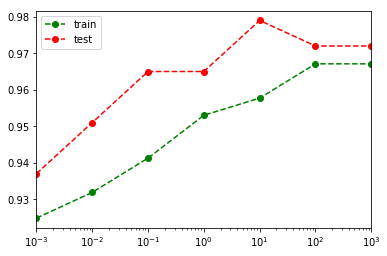

In [64]:
train_results.plot(logx=True, style=train_test_styles)

Q: 샘플이 모자르고 구하기 어렵다면?

In [65]:
iris = pd.read_csv('data/iris.data', header=None)

In [66]:
iris[:5]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
평균, 편차 = iris[0].mean(), iris[0].std()

In [69]:
평균, 편차

(5.843333333333335, 0.8280661279778629)

In [70]:
y = iris[4]
X = iris.values[:, :4].astype('float32')

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [81]:
logreg = LogisticRegression(C=1.0).fit(X_train, y_train)

In [82]:
logreg.score(X_test, y_test)

0.97368421052631582

In [83]:
w = logreg.coef_
b = logreg.intercept_

In [84]:
w.shape

(3, 4)

```
선형분류의 한계
 -> 원래는 이진분류만 지원
 
 -> 다중 분류의 경우 어떻게?
   -> 각각의 케이스에 대한 퍼셉트론을 만듦.
     -> X인지 아닌지
   -> 분류가 3가지라면 총 3개의 퍼셉트론
   -> 여러개의 퍼셉트론이 있다고 해도, 신경망은 아님 
     -> 신경망은 퍼셉트론이 많을 뿐 아니라 Layer도 존재해야 함
     
 -> 선형분류의 옵션 중 multi_class라는 옵션 존재
   -> 기본 옵션은 ovr (one vs. rest)
   -> Multinomial 이라는 옵션이 존재하나, 학습해도 그다지 이익이 크지 않음 (딥러닝의 softMax와 흡사)
```

In [87]:
from deepy.dataset import mnist

In [88]:
(X_train, y_train), (X_test, y_test) = mnist.load_mnist(flatten=False, normalize=False)

6만개의 샘플, 1, 28, 28은 이미지 데이터이기 때문에 존재

In [101]:
X_train.shape

(60000, 784)

In [102]:
x = X_train[0]
x.shape

(784,)

1->흑백 이미지란 뜻

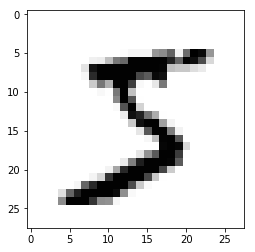

In [105]:
plt.imshow(x.reshape(28, 28), 'Greys')

In [93]:
y_train[0]

5

In [98]:
X_train = X_train.reshape(-1, 1*28*28)
X_test = X_test.reshape(-1, 1*28*28)

In [99]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [106]:
X_train.dtype

dtype('uint8')

In [107]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [108]:
X_train.max(), X_test.max()

(1.0, 1.0)

In [109]:
logreg = LogisticRegression().fit(X_train, y_train)

```
조금 더 빠른 학습을 위한 방법 SGD
 -> 전체 데이터를 mini Batch의 단위로 잘라서 이용
```

In [113]:
from sklearn.linear_model import SGDClassifier

In [114]:
logreg = SGDClassifier(loss='log', tol=1e-4).fit(X_train, y_train)

In [118]:
logreg.score(X_test, y_test)

0.91600000000000004

In [119]:
y_pred = logreg.predict(X_test)

In [120]:
logreg.score(X_test, y_test)

0.91600000000000004

OCR과 같은 기술들에 응용

# 1985 결정트리

In [216]:
from sklearn.tree import DecisionTreeClassifier

In [217]:
y = cancer['type']
X = cancer.values[:, 1:].astype('float32')

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [219]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree_depth4 = DecisionTreeClassifier(max_depth=5, random_state=0).fit(X_train, y_train)
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [220]:
tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.8951048951048951)

In [221]:
tree_depth4.score(X_train, y_train), tree_depth4.score(X_test, y_test)

(0.99061032863849763, 0.93006993006993011)

결정트리 시각화

In [222]:
from sklearn.tree import export_graphviz


In [223]:
export_graphviz(tree_depth4, out_file='tree.dot', class_names=['M', 'B'],
                feature_names=cancer.columns[1:],
                impurity=False, filled=True)

In [224]:
import graphviz

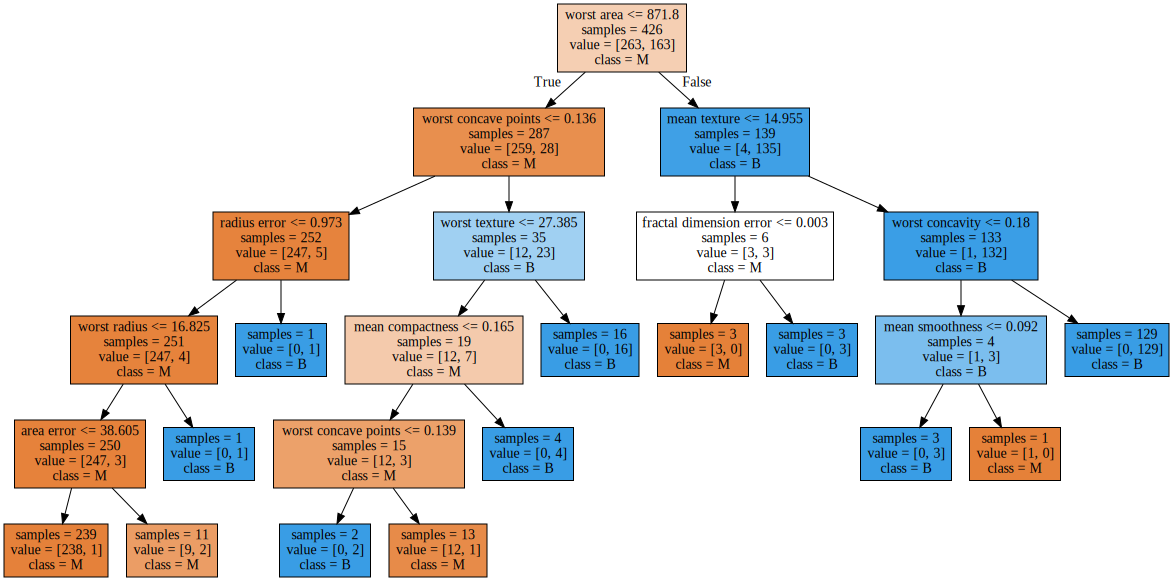

In [225]:
with open('tree.dot') as 파일:
    dot_graph = 파일.read()
display(graphviz.Source(dot_graph))

In [226]:
특성중요도 = tree.feature_importances_

In [227]:
특성중요도

array([ 0.        ,  0.00662483,  0.        ,  0.        ,  0.        ,
        0.02008371,  0.01490588,  0.        ,  0.01383674,  0.        ,
        0.        ,  0.        ,  0.        ,  0.01547861,  0.        ,
        0.00731743,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00966154,  0.04432488,  0.00496863,  0.71029749,  0.        ,
        0.        ,  0.        ,  0.13871118,  0.01378908,  0.        ])

In [228]:
특성중요도 = pd.Series(특성중요도, index=cancer.columns[1:])

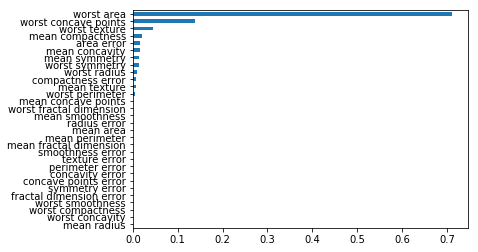

In [229]:
특성중요도.sort_values().plot(kind='barh')

```
특성선택의 무작위성 때문에 중요도가 돌릴 때마다 다르게 나올 수 있다.
 -> 트리를 어떤 특성으로부터 시작하냐...
```

결정트리 회귀

In [248]:
y = boston['Price']
X = boston.values[:, 1:].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [249]:
from sklearn.tree import DecisionTreeRegressor

In [266]:
tree_reg = DecisionTreeRegressor(max_depth=6).fit(X_train, y_train)

In [267]:
tree_reg.score(X_train, y_train), tree_reg.score(X_test, y_test)

(0.95437415763949618, 0.87446271553461863)

단점 : 결정트리는 훈련데이터 범위 밖의 포인트에 대해 예측할 수 없다.

In [268]:
ram_price = pd.read_csv('data/ram_price.csv')

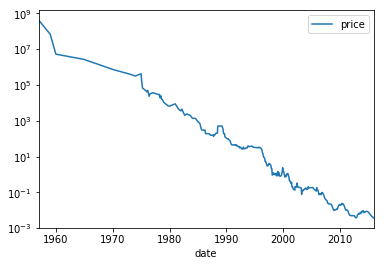

In [272]:
ram_price.set_index('date').plot(logy=True)

In [275]:
y = ram_price['price']
X = ram_price.values[:, 0].astype('float32')

In [276]:
X = X.reshape(-1, 1)

In [277]:
X.shape

(333, 1)

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False) #그래프를 그리기 위해 Shuffle False

In [280]:
tree_reg = DecisionTreeRegressor().fit(X_train, y_train)

In [281]:
tree_reg.score(X_train, y_train)

1.0

In [282]:
tree_reg.score(X_test, y_test)

-14.414393924451142

예측이 완벽하게 실패했다.

In [293]:
logy_train = np.log(y_train)
logy_test = np.log(y_test)

In [297]:
linreg.score(X_train, logy_train), linreg.score(X_test, logy_test)

(0.96861564417852986, 0.37473953075947636)

In [285]:
y_pred_train = tree_reg.predict(X_train)
y_pred_test = tree_reg.predict(X_test)

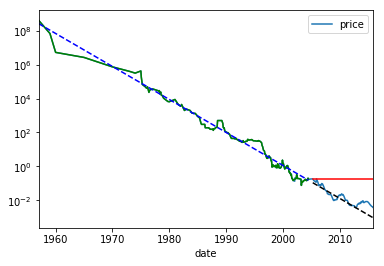

In [299]:
그래프 = ram_price.set_index('date').plot(logy=True)
그래프.plot(X_train.flatten(), y_pred_train, color='g')
그래프.plot(X_test.flatten(), y_pred_test, color='r')
그래프.plot(X_train.flatten(), np.exp(y_pred2_train), 'b--')
그래프.plot(X_test.flatten(), np.exp(y_pred2_test), 'k--')

빨간색 직선 부분 -> 외삽 -> 범위를 벗어난 데이터

In [288]:
from sklearn.linear_model import LinearRegression

In [294]:
linreg = LinearRegression().fit(X_train, logy_train)
y_pred2_train = linreg.predict(X_train)
y_pred2_test = linreg.predict(X_test)

# 조합모델
주로 과적합 개선에 도움

# Random Forest
부트스트랩 샘플링

In [300]:
샘플번호 = np.arange(10)
샘플번호

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

샘플번호를 어떻게 선택하느냐가 핵심

In [301]:
샘플1 = np.random.choice(샘플번호, 10)
샘플1

array([9, 8, 0, 7, 7, 3, 0, 9, 7, 5])

In [302]:
샘플2 = np.random.choice(샘플번호, 10)
샘플2

array([0, 6, 2, 4, 4, 9, 5, 2, 0, 4])

부트스트랩 샘플링은 중복을 허용

In [303]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [304]:
cancer[:5]

,type,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [373]:
y = cancer['type']
X = cancer.values[:, 1:].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y)

forest = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
forest.score(X_train, y_train), forest.score(X_test, y_test)

(1.0, 0.95104895104895104)

In [319]:
boston[:5]

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [384]:
y = boston['Price']
X = boston.values[:, 1:].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y)

forest_reg = RandomForestRegressor(n_estimators=10000, n_jobs=-1).fit(X_train, y_train)
forest_reg.score(X_train, y_train), forest_reg.score(X_test, y_test)

(0.98403780354015036, 0.87769363298027614)

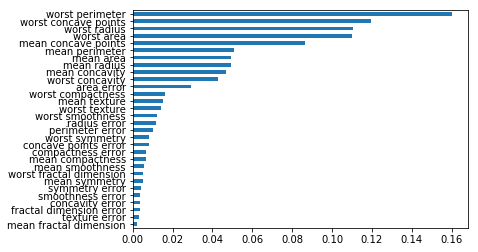

In [374]:
특성중요도 = forest.feature_importances_
특성중요도 = pd.Series(특성중요도, index=cancer.columns[1:])
특성중요도.sort_values().plot(kind='barh')